In [ ]:
# in refrence to https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Timeseries%20anomaly%20detection%20using%20LSTM%20Autoencoder%20JNJ.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



data = pd.read_csv("./eld_data.csv",delimiter=",")

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import keras
import tensorflow as tf

from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

### Data loading

In [12]:
data_filtered = pd.read_pickle("./eld_filtered_labled.pkl")
data_filtered.drop('day_of_week', axis=1)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,Consumption
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,1.937882,27.115731,1.585617,155.263258,68.167038,263.700509,5.024925,363.593198,55.127590,38.270338,...,43292.629385,2844.800579,4123.912354,138.483075,5.603357,500.623179,136.130412,790.281806,15547.424484,1
2014-12-31 23:15:00,1.981888,26.923944,1.602215,155.226250,67.874771,266.622308,4.992699,360.330564,53.932498,38.299165,...,42599.507983,2894.784576,4115.998551,133.152841,5.591115,504.128417,137.430207,780.245404,15299.547641,1
2014-12-31 23:30:00,2.029872,26.783984,1.620246,155.026071,67.428167,269.406435,4.996814,357.207358,53.161740,38.403461,...,41799.811247,2928.852599,4095.012055,127.640601,5.541062,508.176658,138.880319,770.151620,15051.396744,1


### Preprocessing

In [14]:
TARGET =370

features = data_filtered.drop('Consumption', axis=1)

target = data_filtered['Consumption']

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, stratify=target
)

In [15]:
x_train.shape[1]

371

In [16]:
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [17]:
#normalizing the data using minmax scaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

### Model defination

In [18]:


class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [19]:
window_length = 4
feats=x_train.shape[1]
model = keras.Sequential()
model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', batch_input_shape=(None, window_length, feats), return_sequences=True, name='encoder_1'))
model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='encoder_2'))
model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=False, name='encoder_3'))
model.add(keras.layers.RepeatVector(window_length, name='encoder_decoder_bridge'))
model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=True, name='decoder_1'))
model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(feats)))
model.compile(loss="mse",optimizer='adam')
model.build()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (LSTM)            (None, 4, 64)             111616    
                                                                 
 encoder_2 (LSTM)            (None, 4, 32)             12416     
                                                                 
 encoder_3 (LSTM)            (None, 16)                3136      
                                                                 
 encoder_decoder_bridge (Rep  (None, 4, 16)            0         
 eatVector)                                                      
                                                                 
 decoder_1 (LSTM)            (None, 4, 16)             2112      
                                                                 
 decoder_2 (LSTM)            (None, 4, 32)             6272      
                                                        

### Training

In [20]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=50,
    batch_size=10,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/50
6781/6781 [==============================] - 35s 5ms/step - loss: 0.0060 - mse: 0.0118 - val_loss: 0.0044 - val_mse: 0.0092
Epoch 2/50
6781/6781 [==============================] - 33s 5ms/step - loss: 0.0044 - mse: 0.0087 - val_loss: 0.0041 - val_mse: 0.0085
Epoch 3/50
6781/6781 [==============================] - 32s 5ms/step - loss: 0.0041 - mse: 0.0082 - val_loss: 0.0042 - val_mse: 0.0087
Epoch 4/50
6781/6781 [==============================] - 32s 5ms/step - loss: 0.0040 - mse: 0.0079 - val_loss: 0.0039 - val_mse: 0.0081
Epoch 5/50
6781/6781 [==============================] - 32s 5ms/step - loss: 0.0038 - mse: 0.0077 - val_loss: 0.0036 - val_mse: 0.0076
Epoch 6/50
6781/6781 [==============================] - 33s 5ms/step - loss: 0.0037 - mse: 0.0074 - val_loss: 0.0034 - val_mse: 0.0072
Epoch 7/50
6781/6781 [==============================] - 33s 5ms/step - loss: 0.0036 - mse: 0.0072 - val_loss: 0.0035 - val_mse: 0.0073
Epoch 8/50
6781/6781 [==============================] -

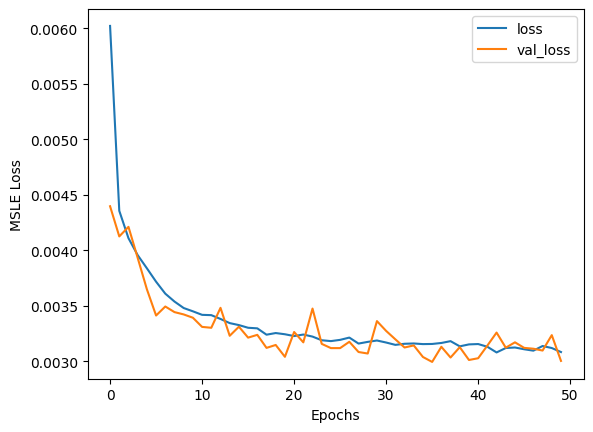

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

### Threshold calculation

In [22]:
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
    # threshold for anomaly scores
    threshold = np.mean(reconstruction_errors.numpy())+ np.std(reconstruction_errors.numpy())
    return threshold

def find_threshold_method_two(model, x_train_scaled):
    # another method to find threshold
    reconstructions = model.predict(x_train_scaled)
    # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
    threshold_2 = np.percentile(reconstruction_errors, 95)
    return threshold_2

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    # provides losses of individual instances
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    # 0 = anomaly, 1 = normal
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
    return preds

In [23]:
threshold = find_threshold(model, x_train_scaled)
print(f"Threshold method one: {threshold}")

threshold_2 = find_threshold_method_two(model, x_train_scaled)
print(f"Threshold method two: {threshold_2}")

2119/2119 [==============================] - 4s 2ms/step
Threshold method one: 0.0037374540487818877
2119/2119 [==============================] - 5s 2ms/step
Threshold method two: 0.004729862865276519


In [24]:
preds = get_predictions(model, x_test_scaled, threshold)
accuracy_score(preds, y_test)

1315/1315 [==============================] - 3s 2ms/step


0.7579675357083442

### Results

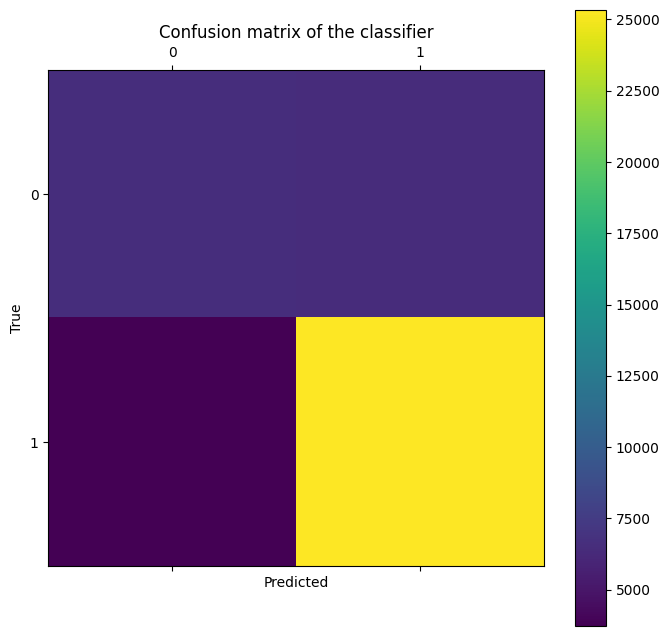

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# assuming y_test and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, preds)
labels = np.unique(y_test)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
        
ax.set_xticklabels([''] + [str(label) for label in labels])
ax.set_yticklabels([''] + [str(label) for label in labels])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

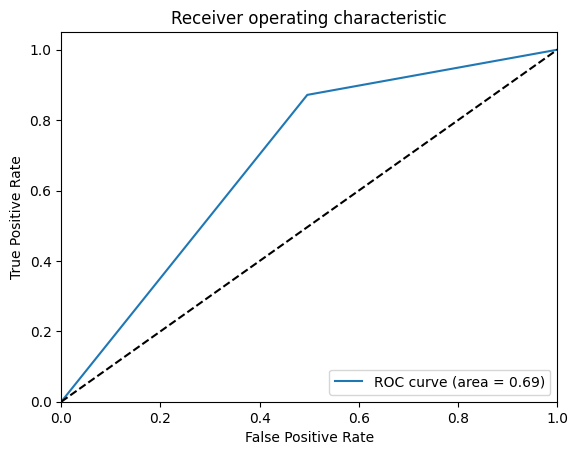

In [33]:
from sklearn.metrics import roc_curve, auc

# y_test and y_pred should be binary (0 or 1)
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, preds)
print(f1)

0.8326321325269525


In [39]:
print (cm)

[[ 6561  6456]
 [ 3728 25332]]


In [40]:
counts = {}

for val in y_test:
    if val in counts:
        counts[val] += 1
    else:
        counts[val] = 1

print(counts)

{1: 29060, 0: 13017}
